In [ ]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
mnist=fetch_openml(name='mnist_784',version=1)

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
X,y=mnist['data'],mnist['target'].astype(np.int0)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,shuffle=True,test_size=.12)

In [ ]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    print(i.shape)

(61600, 784)
(8400, 784)
(61600,)
(8400,)


In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6])

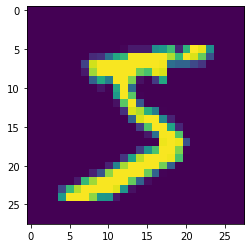

In [ ]:
plt.imshow(X[0].reshape(28,28))


#### A Model , train diffrent-2 stypes.
1.   full data set train & split into test 

* (playing with lables)
1.   List item
2.   List item


2.   List item



In [ ]:
Ytrain_5=(Ytrain==5)
Ytest_5=(Ytest==5)
Ytrain_5.shape

(61600,)

In [ ]:
Ytrain_5

array([False, False, False, ..., False, False, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model_1=SGDClassifier(random_state=42)

In [ ]:
model_1.fit(Xtrain,Ytrain_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model_1.score(Xtrain,Ytrain_5)

0.9422889610389611

In [ ]:
model_1_preY=model_1.predict(Xtest)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score,precision_recall_curve

In [ ]:
for i in [confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve]:
    print(i.__name__,': \n' ,(i(Ytest_5,model_1_preY)),'\n')

confusion_matrix : 
 [[7671   11]
 [ 454  264]] 

accuracy_score : 
 0.9446428571428571 

precision_score : 
 0.96 

recall_score : 
 0.36768802228412256 

f1_score : 
 0.5317220543806647 

precision_recall_curve : 
 (array([0.08547619, 0.96      , 1.        ]), array([1.        , 0.36768802, 0.        ]), array([False,  True])) 



In [ ]:
precision_score(Ytest_5,model_1_preY,average='binary')

0.96

In [ ]:
from sklearn.metrics import plot_confusion_matrix

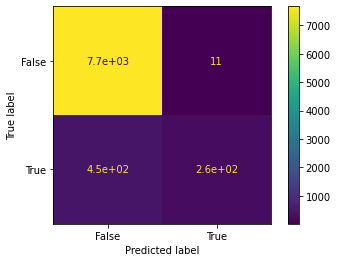

In [ ]:
plot_confusion_matrix(model_1,Xtest,Ytest_5,include_values=True)

In [ ]:
precision ,recall ,thresould=precision_recall_curve(Ytest_5,model_1_preY,)

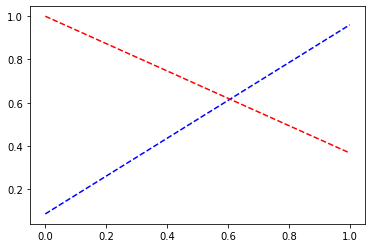

In [ ]:
plt.plot(thresould,precision[:-1],'b--',label='precision');
plt.plot(thresould,recall[:-1],'r--',label='recall');

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train_large = (Ytrain_5 >= 7)
y_train_odd = (Ytrain_5 % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(Xtrain, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.predict([Xtest[3]])

array([[False, False]])

# A.I Joon

In [ ]:
print('hello ali')

hello ali


In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris=load_iris()
X=iris.data[:,(2,3)]
Y=(iris.target==0).astype(np.int0)

In [ ]:
clf=Perceptron()
clf.fit(X,Y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf.predict([[0,0]])

array([1])

In [ ]:
import tensorflow as tf
from tensorflow import keras 

In [ ]:
fasion_mnist=keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fasion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shap

(10000, 28, 28)

In [ ]:
X_vald,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0  #0-1 range by divided 255.0
Y_vald,Y_train=y_train_full[:5000],y_train_full[5000:]

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [57]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.layers

In [63]:
model.compile(loss='sparse_categorical_crossentropy'
,optimizer='sgd'
,metrics=['accuracy'])

In [64]:
model.fit(X_train,Y_train)

1719/1719 [==============================] - 7s 4ms/step - loss: 0.7169 - accuracy: 0.7654


In [73]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 79.4762 - accuracy: 0.7750


[79.4761962890625, 0.7749999761581421]

In [80]:
MODEL_PREDICT=model.predict_classes(X_vald,)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [78]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(Y_vald,MODEL_PREDICT)

0.8346

In [77]:
model.predict_classes(X_vald,)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 0, 3, ..., 5, 8, 3])